[[ 7.03511522e-03 -8.38755937e-02  1.00000000e+00]
 [ 1.73237133e-01 -4.16217651e-01  1.00000000e+00]
 [ 1.98507057e+00  1.40892533e+00  1.00000000e+00]
 [ 1.69681232e-01  4.11923819e-01  1.00000000e+00]
 [ 1.05906338e-02 -1.02910805e-01  1.00000000e+00]
 [ 1.62456576e-01  4.03059023e-01  1.00000000e+00]
 [ 5.56428888e-05 -7.45941612e-03  1.00000000e+00]
 [ 3.24837370e-01 -5.69945059e-01  1.00000000e+00]
 [ 1.63936091e-01  4.04890221e-01  1.00000000e+00]
 [ 1.50992863e-02  1.22879153e-01  1.00000000e+00]
 [ 9.69412730e-01 -9.84587594e-01  1.00000000e+00]
 [ 5.61783818e-02  2.37019792e-01  1.00000000e+00]
 [ 9.75023389e-02  3.12253645e-01  1.00000000e+00]
 [ 1.17156201e-01 -3.42280880e-01  1.00000000e+00]
 [ 8.36951136e-02  2.89301078e-01  1.00000000e+00]
 [ 4.04372147e-01  6.35902624e-01  1.00000000e+00]
 [ 7.44755626e-01  8.62992251e-01  1.00000000e+00]
 [ 1.71151778e+00  1.30824989e+00  1.00000000e+00]
 [ 3.66666003e+00 -1.91485248e+00  1.00000000e+00]
 [ 4.37079933e-02 -2.09064567e-

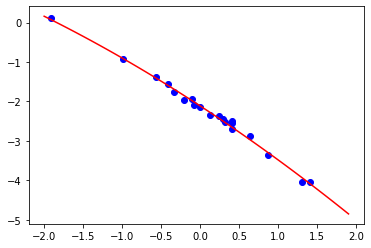

In [7]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

# generate "noisy" data
n = 20 # number of points
x = np.random.randn(n)
y = np.random.randn(1)*x*x + np.random.randn(1)*x + np.random.randn(1) # second-order polynomial
y = y + 0.1*np.random.randn(n) # add noise

# your least-squares estimation code here (2 lines)
X = np.stack((np.square(x), x, np.ones((n))), axis=1)
#print(X)
u = inv(np.transpose(X)@X)@np.transpose(X)@y 

# plot data and least-squares fit
xp = np.arange(-2,2,0.1)
yp = u[0]*xp*xp + u[1]*xp + u[2]
plt.plot(x,y,'bo') # original data
plt.plot( xp, yp, 'r-' ) # second-order polynomial fit
plt.show()



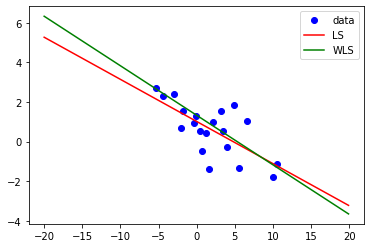

In [12]:
# generate "noisy" data
n = 20 # number of points
x = 5*np.random.randn(n)
y = np.random.randn(1)*x + np.random.randn(1) # first-order polynomial
y = y + np.random.randn(n) # add noise

# your least-squares estimation code here
X = np.stack((x, np.ones((n))), axis=1)
#print(X)
u = inv(np.transpose(X)@X)@np.transpose(X)@y 

# your weighted least-squares estimation code here
w = 1+ np.sqrt(np.square(x) + np.square(y))
W = np.diag(w)
W2 = W@W
uw = inv(np.transpose(X)@W2@X)@np.transpose(X)@W2@y 

# plot data and least-squares fit
x0 = np.arange(-20,20,0.1)
y1 = u[0]*x0 + u[1]
y2 = uw[0]*x0 + uw[1]

ax = plt.subplot(1,1,1)
plt.plot(x,y,'bo', label='data') # original data
plt.plot( x0, y1, 'r-', label='LS') # least-squares fit
plt.plot( x0, y2, 'g-', label='WLS' ) # weighted least-squares fit
ax.legend()
plt.show()